In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,Normalizer,OneHotEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
import time
import re
from requests.exceptions import RequestException
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV


- [x] URL(not useful) & Icon URL --> regex https://www.edureka.co/blog/web-scraping-with-python/
- [] ID --> not important feature if is all unique (same id from URL) `unique`
- [] name --> from URL (same) `unique`
- [x] subtitle (Web scraping)--> nulls 3749 
- [] In-app Purchases --> don't know ?? https://scikit-learn.org/stable/modules/impute.html or randomforestclacifier model (to fill null)
- [] Developer --> incoding
- [x] age rating --> remove "+" from the end 
- [x] Primary Genre --> incoding "important feature"
- [x] Original Release "Date" --> years and month and day (kam game bt release fl any season as category )
- [x] Current Version Release "Date" --> modet astmrar al game ad eh ?

- [x] Description --> mmkn NLP
 User Rating Count & price & Size & Rate--> numerical valuse

In [2]:
data = pd.read_csv('games-classification-dataset.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           5214 non-null   object 
 1   ID                            5214 non-null   int64  
 2   Name                          5214 non-null   object 
 3   Subtitle                      1465 non-null   object 
 4   Icon URL                      5214 non-null   object 
 5   User Rating Count             5214 non-null   int64  
 6   Price                         5214 non-null   float64
 7   In-app Purchases              3175 non-null   object 
 8   Description                   5214 non-null   object 
 9   Developer                     5214 non-null   object 
 10  Age Rating                    5214 non-null   object 
 11  Languages                     5203 non-null   object 
 12  Size                          5214 non-null   int64  
 13  Pri

In [3]:
X = data.drop('Rate', axis=1)
Y=data['Rate']
print(Y.shape)


(5214,)


In [4]:
data.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Rate
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,Intermediate
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,Intermediate
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,High
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,Intermediate
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,High


In [5]:
print(data.isnull().sum())

URL                                0
ID                                 0
Name                               0
Subtitle                        3749
Icon URL                           0
User Rating Count                  0
Price                              0
In-app Purchases                2039
Description                        0
Developer                          0
Age Rating                         0
Languages                         11
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
Rate                               0
dtype: int64


In [6]:
data.describe()

,ID,User Rating Count,Price,Size
count,5.214000e+03,5.214000e+03,5214.000000,5.214000e+03
mean,8.679120e+08,3.669878e+03,0.602551,1.379577e+08
std,2.941461e+08,4.977621e+04,2.551937,2.526826e+08
min,2.849214e+08,5.000000e+00,0.000000,2.158400e+05
25%,5.954790e+08,1.300000e+01,0.000000,2.751732e+07
50%,9.194275e+08,4.900000e+01,0.000000,6.740582e+07
75%,1.114815e+09,3.320000e+02,0.000000,1.592689e+08
max,1.341837e+09,3.032734e+06,139.990000,4.005591e+09


In [7]:
def donutChar(x):
    plt.style.use('classic')
    plt.style.use('Solarize_Light2')
    data.groupby(x).count()['Rate'].plot(kind='pie', autopct= '%.2f', figsize=(20,14),subplots=True, wedgeprops=dict(width=0.40))
    plt.title('Distribution of '+x)
    plt.show()

In [8]:
#donutChar('Developer')

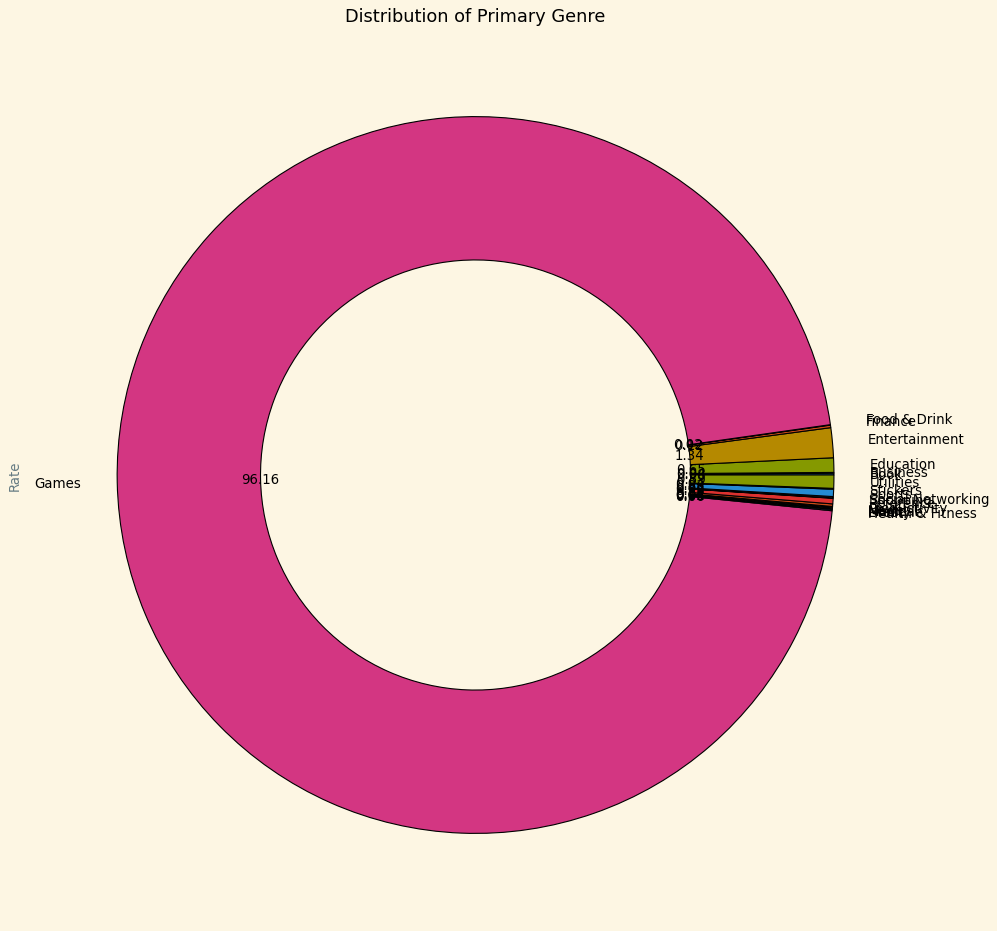

In [9]:
donutChar('Primary Genre')

In [10]:
#remove null from languages
data = data.fillna({'Languages':'EN'})
print(data.isnull().sum())

#fill null in subtitle with its name
#data['Subtitle'] = data['Subtitle'].fillna(data['Name'])

URL                                0
ID                                 0
Name                               0
Subtitle                        3749
Icon URL                           0
User Rating Count                  0
Price                              0
In-app Purchases                2039
Description                        0
Developer                          0
Age Rating                         0
Languages                          0
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
Rate                               0
dtype: int64


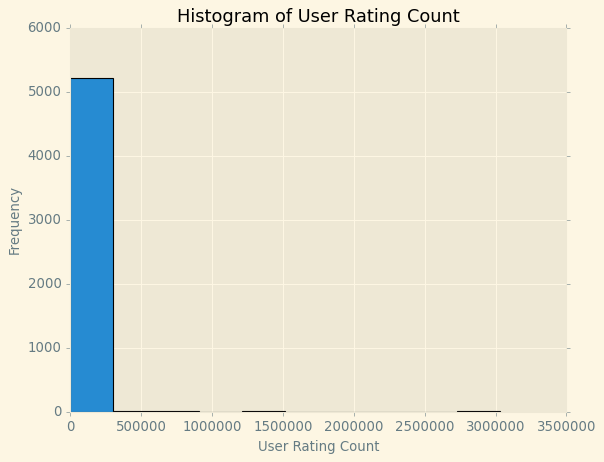

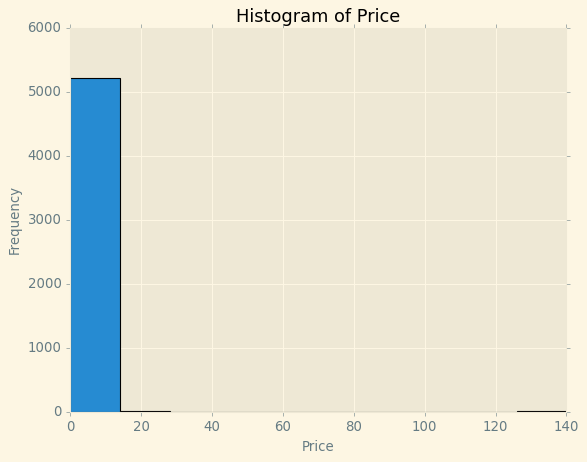

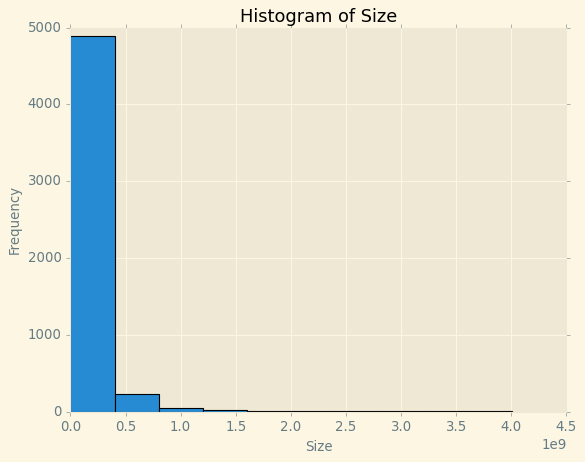

In [11]:
import matplotlib.pyplot as plt

# Loop through all columns
for col in data.select_dtypes(include='number').columns:
    if(col == "ID"): 
        continue
    # Draw a histogram for the current column
    plt.hist(data[col], edgecolor="black")
    plt.title("Histogram of {}".format(col))
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

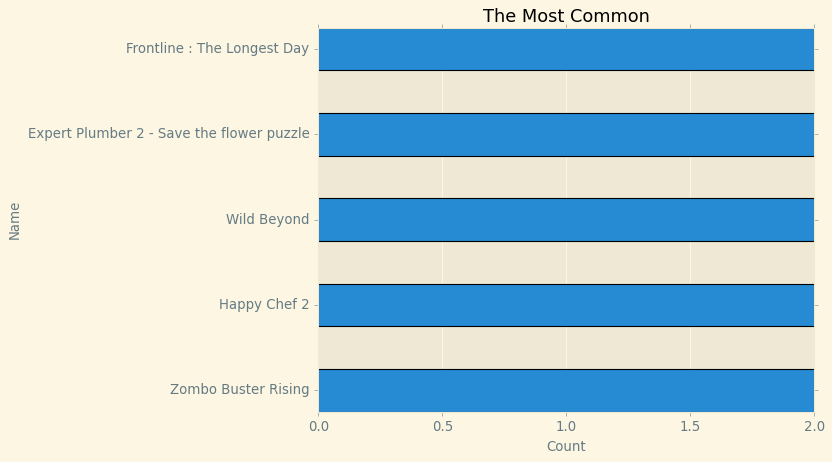

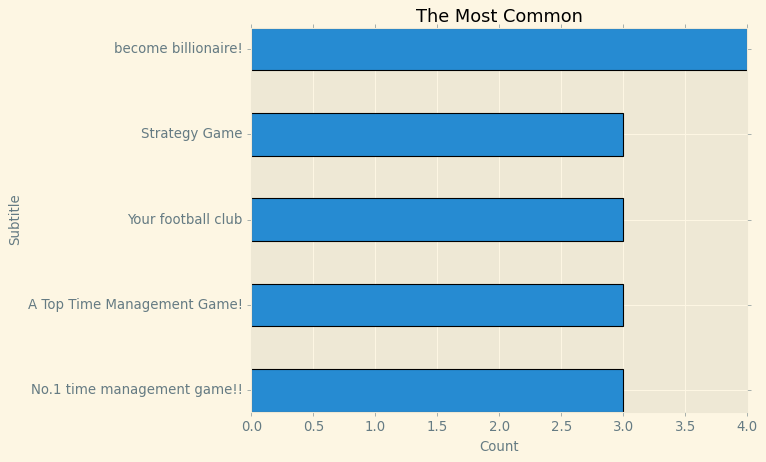

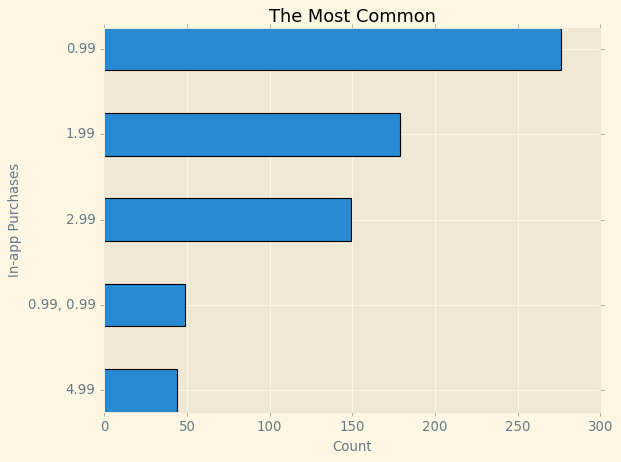

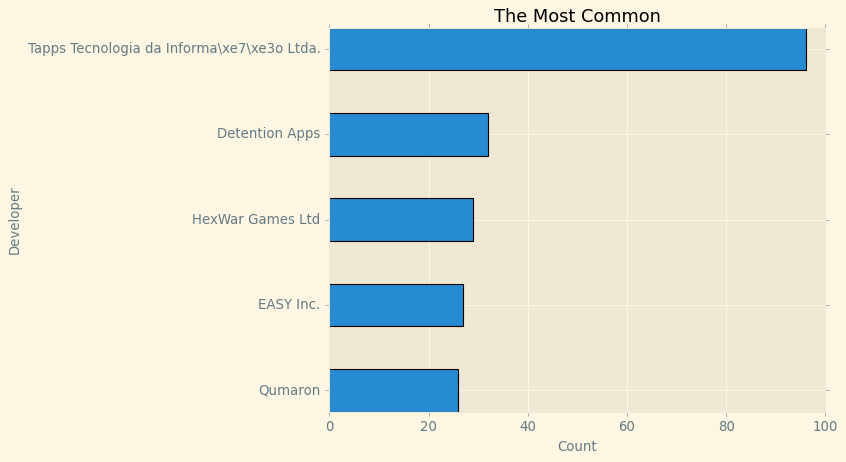

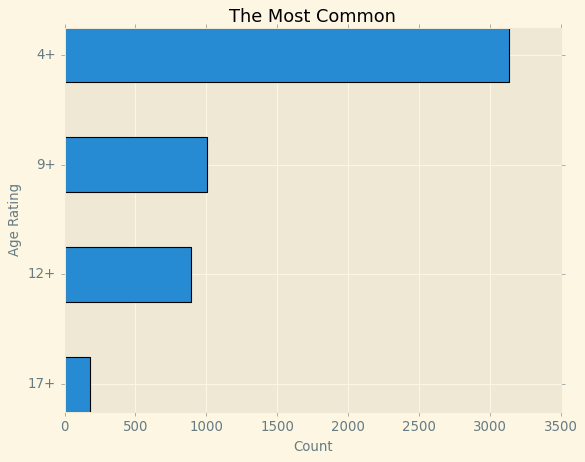

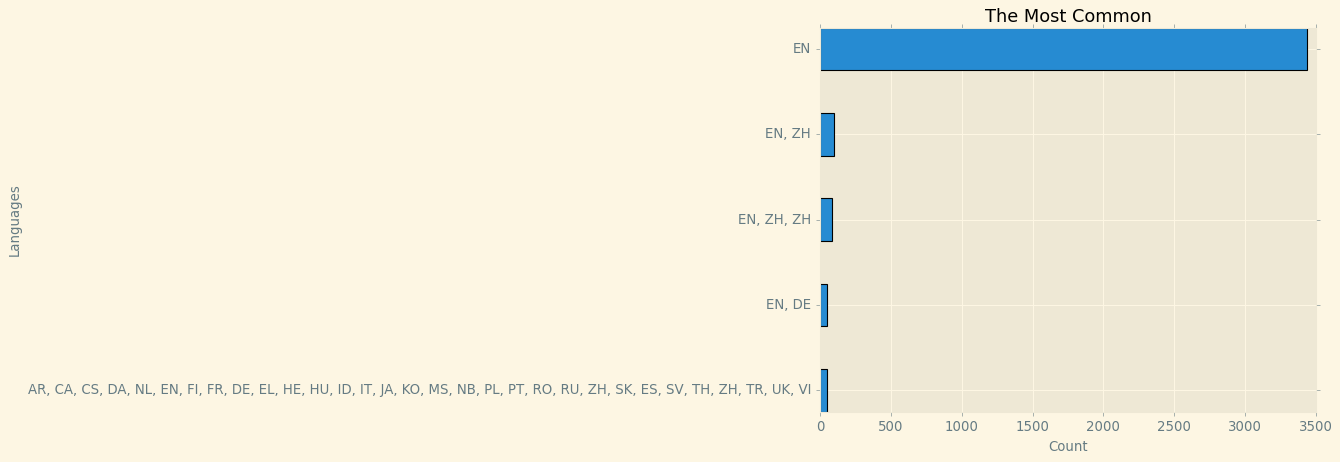

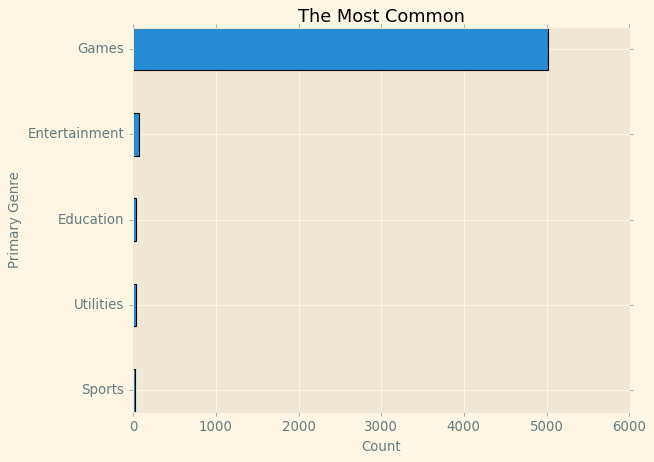

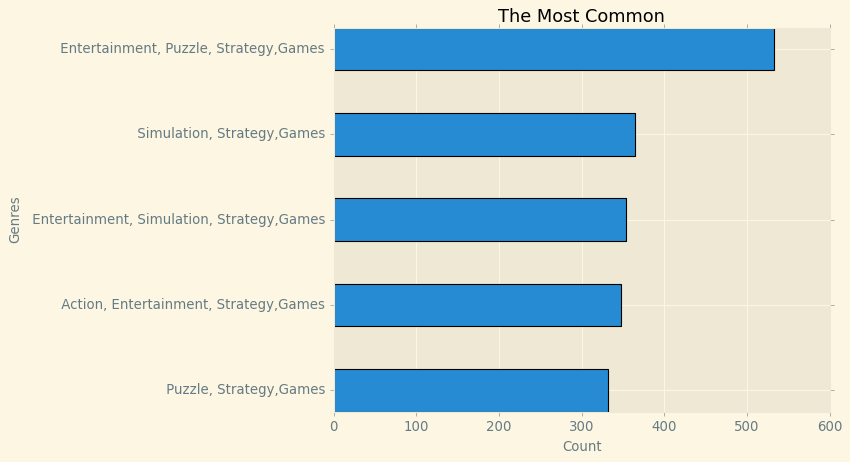

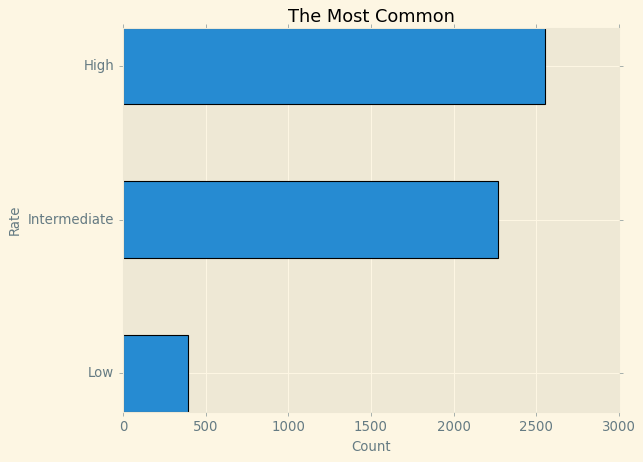

In [12]:
# Preprocess "Genres" column by sorting individual values in each row
data['Genres'] = data['Genres'].apply(lambda x: ','.join(sorted(x.split(','))))

# Create a list of columns to visualize
columns = ["Name", "Subtitle", "In-app Purchases", "Developer", "Age Rating", "Languages", "Primary Genre", "Genres", "Rate"]

# Loop through the selected columns
for col in columns:
  if data[col].dtype == 'object':
        # Get the counts of each category in the column
        counts = data[col].value_counts()
        
        # Create a horizontal bar plot
        plt.barh(counts.index[:5], counts.values[:5], height=0.5) # Top 5
        # plt.barh(counts.index[:5], counts.values[:5], height=0.5, edgecolor="black") # Top 5

        # Add labels and title
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.title("The Most Common")
        
        # Invert the y-axis to show the most common categories at the top
        plt.gca().invert_yaxis()
        
        # Show the plot
        plt.show()

In [13]:
#data = data[data['User Rating Count'] >= 100]


In [14]:
# Size of game
# 25% of game size is 2.751732e+07, 50% is 6.740582e+07,75% is 1.592689e+08. Split into 4 categories
data['size_Q1'] = data['Size'].apply(lambda x: 1 if x < 2.751732e+07 else 0)
data['size_Q2'] = data['Size'].apply(lambda x: 1 if 2.751732e+07 <= x < 6.740582e+07 else 0)
data['size_Q3'] = data['Size'].apply(lambda x: 1 if 6.740582e+07 <= x < 1.592689e+08 else 0)
data['size_Q4'] = data['Size'].apply(lambda x: 1 if x >= 1.592689e+08 else 0)

# Num of words in description
data['Num_words_description'] = data['Description'].apply(lambda x: len(re.findall('(\w+)',str(x))))

In [15]:
# Includes subtitle? (y/n)
data['Subtitle'] = data['Subtitle'].fillna('') #No data will be taken as empty string
data['subtitle_yes_no'] = data['Subtitle'].apply(lambda x: 0 if x == '' else 1)

# In app purchases categories and dummy variables
data['In-app Purchases'] = data['In-app Purchases'].fillna('0.0') #No data will be taken as $0
#data['In-app Purchases'] = data['In-app Purchases'].apply(lambda x: '0.0' if x == '0' else x) #for consistency
data['In-app Purchases'] = data['In-app Purchases'].apply(lambda x: x.split(', ')) #turn string into list

# Prices range from 0 to 99.99. Split into 4 quadrants
data['In-App-Q1'] = data['In-app Purchases'].apply(lambda x: 1 if any(float(i) < 25 for i in x) else 0) #prices from 0 to 24.99
data['In-App-Q2'] = data['In-app Purchases'].apply(lambda x: 1 if any(25 <= float(i) < 50 for i in x) else 0) #prices from 25 to 49.99
data['In-App-Q3'] = data['In-app Purchases'].apply(lambda x: 1 if any(50 <= float(i) < 75 for i in x) else 0) #prices from 50 to 74.99
data['In-App-Q4'] = data['In-app Purchases'].apply(lambda x: 1 if any(75 <= float(i) < 100 for i in x) else 0) #prices from 75 to 99.99


# Split the data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Rate', axis=1), data['Rate'], test_size=0.20, random_state=42)

In [17]:
#!pip install webdriver-manager

In [18]:
'''
import requests

url = 'https://apps.apple.com/us/app/heir-of-light/id1264483706'
headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.' }

response = requests.get(url, headers=headers)
print(response.ok)
print(response.text)
'''

"\nimport requests\n\nurl = 'https://apps.apple.com/us/app/heir-of-light/id1264483706'\nheaders = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:42.0) Gecko/20100101 Firefox/42.' }\n\nresponse = requests.get(url, headers=headers)\nprint(response.ok)\nprint(response.text)\n"

In [19]:
'''
# iterate over rows in the Subtitle column where value is null
for index, row in data.loc[data["Subtitle"].isnull()].iterrows():
    url = row["URL"]
    #time.sleep(5)
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.72 Safari/537.36'}
    response = requests.get(url,headers=headers)
    # check for successful response
    if response.ok:
        # parse HTML source code
        soup = BeautifulSoup(response.content, "html.parser")

        # extract subtitle data
        try:
            subtitle_text = soup.select_one("h2.product-header__subtitle.app-header__subtitle").text.strip()
        except AttributeError:
            subtitle_text = ""

        # fill in the null cell with subtitle data
        data.loc[index, "Subtitle"] = subtitle_text

    else:
        data.loc[index, "Subtitle"] = data.loc[index, "Name"]
        print(f"Error: Could not download HTML source code for URL {url}")
'''


'\n# iterate over rows in the Subtitle column where value is null\nfor index, row in data.loc[data["Subtitle"].isnull()].iterrows():\n    url = row["URL"]\n    #time.sleep(5)\n    headers = {\'User-Agent\': \'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.72 Safari/537.36\'}\n    response = requests.get(url,headers=headers)\n    # check for successful response\n    if response.ok:\n        # parse HTML source code\n        soup = BeautifulSoup(response.content, "html.parser")\n\n        # extract subtitle data\n        try:\n            subtitle_text = soup.select_one("h2.product-header__subtitle.app-header__subtitle").text.strip()\n        except AttributeError:\n            subtitle_text = ""\n\n        # fill in the null cell with subtitle data\n        data.loc[index, "Subtitle"] = subtitle_text\n\n    else:\n        data.loc[index, "Subtitle"] = data.loc[index, "Name"]\n        print(f"Error: Could not download HTML source code fo

In [20]:
'''
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(x_train[['Primary Genre']])
X_train_encoded = encoder.transform(x_train[['Primary Genre']])
X_test_encoded = encoder.transform(x_test[['Primary Genre']])

# Create dataframes from encoded data and feature names
feature_names = encoder.get_feature_names(['Primary Genre'])
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=feature_names)

# Concatenate encoded dataframes with X_train and X_test
x_train = pd.concat([x_train.reset_index(drop=True), X_train_encoded_df], axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), X_test_encoded_df], axis=1)

# Print the first 50 rows of the encoded test data
print(feature_names)

# Check for missing values
print('Missing values in X_train:\n', x_train.isnull().sum())
print('Missing values in X_test:\n', x_test.isnull().sum())
'''

"\nencoder = OneHotEncoder(handle_unknown='ignore')\nencoder.fit(x_train[['Primary Genre']])\nX_train_encoded = encoder.transform(x_train[['Primary Genre']])\nX_test_encoded = encoder.transform(x_test[['Primary Genre']])\n\n# Create dataframes from encoded data and feature names\nfeature_names = encoder.get_feature_names(['Primary Genre'])\nX_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=feature_names)\nX_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=feature_names)\n\n# Concatenate encoded dataframes with X_train and X_test\nx_train = pd.concat([x_train.reset_index(drop=True), X_train_encoded_df], axis=1)\nx_test = pd.concat([x_test.reset_index(drop=True), X_test_encoded_df], axis=1)\n\n# Print the first 50 rows of the encoded test data\nprint(feature_names)\n\n# Check for missing values\nprint('Missing values in X_train:\n', x_train.isnull().sum())\nprint('Missing values in X_test:\n', x_test.isnull().sum())\n"

In [21]:
# create a label encoder instance and fit it on the training data
c_encoder = LabelEncoder()
print(c_encoder.fit(x_train["Primary Genre"]))

# encode the "Primary Genre" feature for both the training and testing data using the encoding values from the training data
x_train["Primary Genre"] = c_encoder.transform(x_train["Primary Genre"])
x_test["Primary Genre"] = c_encoder.transform(x_test["Primary Genre"])

x_test["Primary Genre"].head(50)


LabelEncoder()


1897    6
877     6
4431    6
4979    6
1595    6
3718    6
893     6
1292    6
1168    6
1144    6
4858    3
553     6
4366    6
3557    6
1736    6
4162    6
1321    6
2732    6
23      6
3961    6
4190    6
2229    6
530     6
2456    6
4348    6
1869    6
3592    6
681     6
168     3
333     6
3543    6
3433    6
3982    6
4005    6
3471    6
3781    6
2955    6
373     6
896     6
2225    6
3570    6
4751    6
4443    6
1086    6
800     6
505     6
1491    6
1220    6
491     6
4044    6
Name: Primary Genre, dtype: int32

In [22]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())


URL                             0
ID                              0
Name                            0
Subtitle                        0
Icon URL                        0
User Rating Count               0
Price                           0
In-app Purchases                0
Description                     0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
size_Q1                         0
size_Q2                         0
size_Q3                         0
size_Q4                         0
Num_words_description           0
subtitle_yes_no                 0
In-App-Q1                       0
In-App-Q2                       0
In-App-Q3                       0
In-App-Q4                       0
dtype: int64
URL                             0
ID                              0
N

In [23]:
# create a label encoder instance and fit it on the training data

print(x_train["Age Rating"])

scale_mapper = {"4+":4, "9+":9, "12+":12, "17+":17}
x_train["Age Rating"] = x_train["Age Rating"].replace(scale_mapper)
x_test["Age Rating"] = x_test["Age Rating"].replace(scale_mapper)

# le = LabelEncoder()
# le.fit(x_train[["Age Rating"]])

# # encode the "Primary Genre" feature for both the training and testing data using the encoding values from the training data
# x_train["Age Rating"] = le.transform(x_train[["Age Rating"]])
# x_test["Age Rating"] = le.transform(x_test[["Age Rating"]])

print(x_train["Age Rating"])

x_train.info()
print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

2173     9+
927      9+
2499    17+
45       4+
1741    17+
       ... 
466      4+
3092     9+
3772     4+
5191     4+
860      4+
Name: Age Rating, Length: 4171, dtype: object
2173     9
927      9
2499    17
45       4
1741    17
        ..
466      4
3092     9
3772     4
5191     4
860      4
Name: Age Rating, Length: 4171, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 2173 to 860
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      4171 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purc

In [24]:
def date(data,x):
    data[x] = pd.to_datetime(data[x], dayfirst=True,infer_datetime_format=True)
    data[x[0]+'_Year'] = pd.DatetimeIndex(data[x]).year
    data[x[0]+'_Month'] = pd.DatetimeIndex(data[x]).month
    data[x[0]+'_Day'] = pd.DatetimeIndex(data[x]).day
    data[x]=data[x].map(datetime.toordinal)


In [25]:
date(x_train,'Original Release Date')
date(x_train,'Current Version Release Date')

x_train['DifferentDate'] = x_train['Current Version Release Date'] - x_train['Original Release Date']

date(x_test,'Original Release Date')
date(x_test,'Current Version Release Date')

x_test['DifferentDate'] = x_test['Current Version Release Date'] - x_test['Original Release Date']

In [26]:
print(x_train.columns)
print(x_train.shape)

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'User Rating Count',
       'Price', 'In-app Purchases', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date', 'size_Q1', 'size_Q2', 'size_Q3',
       'size_Q4', 'Num_words_description', 'subtitle_yes_no', 'In-App-Q1',
       'In-App-Q2', 'In-App-Q3', 'In-App-Q4', 'O_Year', 'O_Month', 'O_Day',
       'C_Year', 'C_Month', 'C_Day', 'DifferentDate'],
      dtype='object')
(4171, 34)


In [27]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 2173 to 860
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      4171 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purchases              4171 non-null   object 
 8   Description                   4171 non-null   object 
 9   Developer                     4171 non-null   object 
 10  Age Rating                    4171 non-null   int64  
 11  Languages                     4171 non-null   object 
 12  Size                          4171 non-null   int64  
 13  P

In [28]:
print(y_train)
# classifierEncoder = LabelEncoder()
scale_mapper = {"Low":1, "Intermediate":2, "High":3}
y_train = y_train.replace(scale_mapper)
y_test = y_test.replace(scale_mapper)
# classifierEncoder.fit(y_train)
# y_train = classifierEncoder.transform(y_train)
# y_test = classifierEncoder.transform(y_test)
print(y_train)
# print(y_train["Rate"])

2173            High
927     Intermediate
2499    Intermediate
45              High
1741    Intermediate
            ...     
466             High
3092    Intermediate
3772    Intermediate
5191    Intermediate
860              Low
Name: Rate, Length: 4171, dtype: object
2173    3
927     2
2499    2
45      3
1741    2
       ..
466     3
3092    2
3772    2
5191    2
860     1
Name: Rate, Length: 4171, dtype: int64


In [29]:
# create a random forest regression model
features = ["User Rating Count", "Age Rating", "Price", "Size" ,"Original Release Date","Current Version Release Date","O_Year","O_Month","O_Day","C_Year","C_Month","C_Day","DifferentDate"]
print(len(features))
model1 = RandomForestClassifier(random_state=42)

# fit the model on the training data
model1.fit(x_train[features], y_train)

# make predictions on the testing data
predictions = model1.predict(x_test[features])

# evaluate the model performance
mse = mean_squared_error(y_test, predictions)
accuracy = r2_score(y_test, predictions)
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)

13
Mean Squared Error:  0.4678811121764142
Accuracy:  -0.18943171886465304


In [30]:
x_train["Languages"].head(10)

2173                                                   EN
927                                                EN, DE
2499                                                   EN
45                                                     EN
1741                                                   EN
2275                                                   EN
3710    AR, DA, NL, EN, FR, DE, ID, IT, JA, KO, MS, NB...
5035                                                   EN
4607       EN, FR, DE, IT, JA, KO, PT, RU, ZH, ES, ZH, TR
283                                                EN, FR
Name: Languages, dtype: object

In [31]:

from sklearn.preprocessing import MultiLabelBinarizer

# Split the values in the "Languages" feature using a comma and a space
x_train["Languages"] = x_train["Languages"].str.split(", ")

# Create an instance of the MultiLabelBinarizer and fit it on the "Languages" feature in x_train
c_MLB = MultiLabelBinarizer()
c_MLB.fit(x_train["Languages"])

# Transform the "Languages" feature into binary vectors for both x_train and x_test
x_train_Languages_encoded = c_MLB.transform(x_train["Languages"])

x_test["Languages"] = x_test["Languages"].str.split(", ")
x_test_Languages_encoded = c_MLB.transform(x_test["Languages"])

# Create new feature names based on the original category names
new_feature_names = ['Languages_' + name for name in c_MLB.classes_] 
#Language_EN

# Add the encoded "Languages" feature to both x_train and x_test
x_train = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(x_train_Languages_encoded, columns=new_feature_names)], axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), pd.DataFrame(x_test_Languages_encoded, columns=new_feature_names)], axis=1)

print(x_test.head(1)['Languages_RU'])
print(len(new_feature_names))

# create a random forest regression model
#features = ["User Rating Count", "Age Rating", "Price", "Size", "Primary Genre","Original Release Date","Current Version Release Date","O_Year","O_Month","O_Day","C_Year","C_Month","C_Day","DifferentDate"]
features = features + new_feature_names
print(len(features))

model2 = RandomForestClassifier(random_state=42)

# fit the model on the training data
model2.fit(x_train[features], y_train)

# make predictions on the testing data
predictions = model2.predict(x_test[features])

# evaluate the model performance
mse = mean_squared_error(y_test, predictions)
accuracy = r2_score(y_test, predictions)
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)



0    1
Name: Languages_RU, dtype: int32
113
126
Mean Squared Error:  0.4621284755512943
Accuracy:  -0.17480755838680895


In [32]:
columns_to_keep = [c for c in x_train.columns if c.startswith('Languages')]
print(x_train[columns_to_keep].head(6))

  Languages  Languages_AF  Languages_AM  Languages_AR  Languages_AS  \
0      [EN]             0             0             0             0   
1  [EN, DE]             0             0             0             0   
2      [EN]             0             0             0             0   
3      [EN]             0             0             0             0   
4      [EN]             0             0             0             0   
5      [EN]             0             0             0             0   

   Languages_AY  Languages_AZ  Languages_BE  Languages_BG  Languages_BN  ...  \
0             0             0             0             0             0  ...   
1             0             0             0             0             0  ...   
2             0             0             0             0             0  ...   
3             0             0             0             0             0  ...   
4             0             0             0             0             0  ...   
5             0       

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the values in the "Genres" feature using a comma and a space
x_train["Genres"] = x_train["Genres"].str.split(", ")
x_test["Genres"] = x_test["Genres"].str.split(", ")

# Create an instance of the MultiLabelBinarizer and fit it on the "Genres" feature in x_train
c_multiLB = MultiLabelBinarizer()
c_multiLB.fit(x_train["Genres"])

# Transform the "Genres" feature into binary vectors for both x_train and x_test
x_train_Genres_encoded = c_multiLB.transform(x_train["Genres"])
x_test_Genres_encoded = c_multiLB.transform(x_test["Genres"])

# Create new feature names based on the original category names
new_feature_names = ['Genres_' + name for name in c_multiLB.classes_]
print(new_feature_names)
# Add the encoded "Genres" feature to both x_train and x_test
x_train = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(x_train_Genres_encoded, columns=new_feature_names)], axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), pd.DataFrame(x_test_Genres_encoded, columns=new_feature_names)], axis=1)

print(len(new_feature_names))

# create a random forest regression model
features = features + new_feature_names
print(len(features))

model3 = RandomForestClassifier(random_state=42)

# fit the model on the training data
model3.fit(x_train[features], y_train)

# make predictions on the testing data
predictions = model3.predict(x_test[features])

# evaluate the model performance
mse = mean_squared_error(y_test, predictions)
accuracy = r2_score(y_test, predictions)
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)

['Genres_ Action', 'Genres_ Adventure', 'Genres_ Board', 'Genres_ Books', 'Genres_ Business', 'Genres_ Card', 'Genres_ Casino', 'Genres_ Casual', 'Genres_ Education', 'Genres_ Entertainment', 'Genres_ Family', 'Genres_ Finance', 'Genres_ Food & Drink', 'Genres_ Games', 'Genres_ Health & Fitness', 'Genres_ Lifestyle', 'Genres_ Medical', 'Genres_ Music', 'Genres_ Navigation', 'Genres_ News', 'Genres_ Photo & Video', 'Genres_ Productivity', 'Genres_ Puzzle', 'Genres_ Racing', 'Genres_ Reference', 'Genres_ Role Playing', 'Genres_ Simulation', 'Genres_ Social Networking', 'Genres_ Sports', 'Genres_ Strategy', 'Genres_ Strategy,Games', 'Genres_Books', 'Genres_Business', 'Genres_Education', 'Genres_Emoji & Expressions', 'Genres_Entertainment', 'Genres_Family', 'Genres_Finance', 'Genres_Food & Drink', 'Genres_Games', 'Genres_Gaming', 'Genres_Health & Fitness', 'Genres_Kids & Family', 'Genres_Lifestyle', 'Genres_Music', 'Genres_News', 'Genres_Photo & Video', 'Genres_Productivity', 'Genres_Puzzl

c:\Users\martina\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['Strategy,Books'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


Mean Squared Error:  0.44870565675934804
Accuracy:  -0.1406845172718394


In [34]:
#x_train = x_train.drop(columns='Genres_Games' ,axis=1)
#x_test = x_test.drop(columns='Genres_Games' ,axis=1)

In [35]:
'''
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier

print(x_train["In-app Purchases"])
# create an iterative imputer instance
imputer = IterativeImputer(estimator=RandomForestClassifier(), random_state=42)

# fit the imputer on the training data
imputer.fit(x_train[features])

# impute the missing values in the "In-app Purchases" feature for the training data only
x_train["In-app Purchases"] = imputer.transform(x_train[features])[:, 0]

# impute the missing values in the "In-app Purchases" feature for the testing data
x_test["In-app Purchases"] = imputer.transform(x_test[features])[:, 0]
'''

'\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nfrom sklearn.ensemble import RandomForestClassifier\n\nprint(x_train["In-app Purchases"])\n# create an iterative imputer instance\nimputer = IterativeImputer(estimator=RandomForestClassifier(), random_state=42)\n\n# fit the imputer on the training data\nimputer.fit(x_train[features])\n\n# impute the missing values in the "In-app Purchases" feature for the training data only\nx_train["In-app Purchases"] = imputer.transform(x_train[features])[:, 0]\n\n# impute the missing values in the "In-app Purchases" feature for the testing data\nx_test["In-app Purchases"] = imputer.transform(x_test[features])[:, 0]\n'

In [36]:
'''
#fill null in "In-app Purchases" with  0
x_train["In-app Purchases"] = x_train["In-app Purchases"].fillna(0)

x_test["In-app Purchases"] = x_test["In-app Purchases"].fillna(0)
'''

'\n#fill null in "In-app Purchases" with  0\nx_train["In-app Purchases"] = x_train["In-app Purchases"].fillna(0)\n\nx_test["In-app Purchases"] = x_test["In-app Purchases"].fillna(0)\n'

In [37]:
x_train["In-app Purchases"].isnull().sum()

0

In [38]:
'''
le = LabelEncoder()
le.fit(x_train["In-app Purchases"].apply(str).unique())

# Apply the label encoder to the column of lists
x_train["In-app Purchases"] = x_train["In-app Purchases"].apply(str).apply(le.transform)
x_test["In-app Purchases"] = x_test["In-app Purchases"].apply(str).apply(le.transform)

'''

'\nle = LabelEncoder()\nle.fit(x_train["In-app Purchases"].apply(str).unique())\n\n# Apply the label encoder to the column of lists\nx_train["In-app Purchases"] = x_train["In-app Purchases"].apply(str).apply(le.transform)\nx_test["In-app Purchases"] = x_test["In-app Purchases"].apply(str).apply(le.transform)\n\n'

In [39]:
'''
from sklearn.preprocessing import MultiLabelBinarizer

# Split the values in the "Developer" feature using a comma and a space
x_train["Developer"] = x_train["Developer"].str.split(", ")
x_test["Developer"] = x_test["Developer"].str.split(", ")

# Create an instance of the MultiLabelBinarizer and fit it on the "Developer" feature in x_train
mlb = MultiLabelBinarizer()
mlb.fit(x_train["Developer"])

# Transform the "Developer" feature into binary vectors for both x_train and x_test
x_train_developer_encoded = mlb.transform(x_train["Developer"])
x_test_developer_encoded = mlb.transform(x_test["Developer"])

# Create new feature names based on the original category names
new_feature_names = ['developer_' + name for name in mlb.classes_]

# Add the encoded "Developer" feature to both x_train and x_test
x_train = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(x_train_developer_encoded, columns=new_feature_names)], axis=1)
x_test = pd.concat([x_test.reset_index(drop=True), pd.DataFrame(x_test_developer_encoded, columns=new_feature_names)], axis=1)

print(len(new_feature_names))

# create a random forest regression model
features = features + new_feature_names
model5 = RandomForestClassifier(random_state=42)

# fit the model on the training data
model5.fit(x_train[features], y_train)

# make predictions on the testing data
predictions = model5.predict(x_test[features])

# evaluate the model performance
mse = mean_squared_error(y_test, predictions)
accuracy = r2_score(y_test, predictions)
print('Mean Squared Error: ', mse)
print('Accuracy: ', accuracy)
'''


'\nfrom sklearn.preprocessing import MultiLabelBinarizer\n\n# Split the values in the "Developer" feature using a comma and a space\nx_train["Developer"] = x_train["Developer"].str.split(", ")\nx_test["Developer"] = x_test["Developer"].str.split(", ")\n\n# Create an instance of the MultiLabelBinarizer and fit it on the "Developer" feature in x_train\nmlb = MultiLabelBinarizer()\nmlb.fit(x_train["Developer"])\n\n# Transform the "Developer" feature into binary vectors for both x_train and x_test\nx_train_developer_encoded = mlb.transform(x_train["Developer"])\nx_test_developer_encoded = mlb.transform(x_test["Developer"])\n\n# Create new feature names based on the original category names\nnew_feature_names = [\'developer_\' + name for name in mlb.classes_]\n\n# Add the encoded "Developer" feature to both x_train and x_test\nx_train = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(x_train_developer_encoded, columns=new_feature_names)], axis=1)\nx_test = pd.concat([x_test.reset_ind

In [40]:
len(features)

208

In [41]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

URL                        0
ID                         0
Name                       0
Subtitle                   0
Icon URL                   0
                          ..
Genres_Trivia,Games        0
Genres_Trivia,Utilities    0
Genres_Utilities,Games     0
Genres_Word,Books          0
Genres_Word,Games          0
Length: 229, dtype: int64
URL                        0
ID                         0
Name                       0
Subtitle                   0
Icon URL                   0
                          ..
Genres_Trivia,Games        0
Genres_Trivia,Utilities    0
Genres_Utilities,Games     0
Genres_Word,Books          0
Genres_Word,Games          0
Length: 229, dtype: int64
0
0


In [42]:
print(x_train.shape)
x_train.info()

(4171, 229)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4171 entries, 0 to 4170
Columns: 229 entries, URL to Genres_Word,Games
dtypes: float64(1), int32(196), int64(23), object(9)
memory usage: 4.2+ MB


In [43]:
print(data.describe())

                 ID  User Rating Count        Price          Size  \
count  5.214000e+03       5.214000e+03  5214.000000  5.214000e+03   
mean   8.679120e+08       3.669878e+03     0.602551  1.379577e+08   
std    2.941461e+08       4.977621e+04     2.551937  2.526826e+08   
min    2.849214e+08       5.000000e+00     0.000000  2.158400e+05   
25%    5.954790e+08       1.300000e+01     0.000000  2.751732e+07   
50%    9.194275e+08       4.900000e+01     0.000000  6.740582e+07   
75%    1.114815e+09       3.320000e+02     0.000000  1.592689e+08   
max    1.341837e+09       3.032734e+06   139.990000  4.005591e+09   

           size_Q1      size_Q2      size_Q3      size_Q4  \
count  5214.000000  5214.000000  5214.000000  5214.000000   
mean      0.250096     0.249904     0.249904     0.250096   
std       0.433110     0.432999     0.432999     0.433110   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   
50%       0.

In [44]:
'''
pattern = r"https://is\d+-ssl\.mzstatic\.com/image/thumb/Purple(?P<purpleNum>\d+)/v4/(?P<p1>[^/]+)/(?P<p2>[^/]+)/(?P<p3>[^/]+)/(?P<imageHash>[^/]+)/.*"
data[["purpleNum","p1","p2","p3","imageHash"]]=data['Icon URL'].str.extract(pattern)
print(data[["purpleNum","p1","p2","p3","imageHash"]])
print(data.isnull().sum())
'''

'\npattern = r"https://is\\d+-ssl\\.mzstatic\\.com/image/thumb/Purple(?P<purpleNum>\\d+)/v4/(?P<p1>[^/]+)/(?P<p2>[^/]+)/(?P<p3>[^/]+)/(?P<imageHash>[^/]+)/.*"\ndata[["purpleNum","p1","p2","p3","imageHash"]]=data[\'Icon URL\'].str.extract(pattern)\nprint(data[["purpleNum","p1","p2","p3","imageHash"]])\nprint(data.isnull().sum())\n'

In [45]:
print(x_train.columns)
print(x_train.shape)

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'User Rating Count',
       'Price', 'In-app Purchases', 'Description', 'Developer',
       ...
       'Genres_Strategy,Stickers', 'Genres_Strategy,Utilities',
       'Genres_Travel,Games', 'Genres_Trivia,Education',
       'Genres_Trivia,Entertainment', 'Genres_Trivia,Games',
       'Genres_Trivia,Utilities', 'Genres_Utilities,Games',
       'Genres_Word,Books', 'Genres_Word,Games'],
      dtype='object', length=229)
(4171, 229)


In [46]:
x_train = x_train.drop(columns=['URL','ID','Name','Subtitle','Icon URL','In-app Purchases','Description','Developer','Languages', 'Primary Genre','Genres', 'Size'],axis=1)
x_test = x_test.drop(columns=['URL','ID','Name','Subtitle','Icon URL','In-app Purchases','Description','Developer','Languages', 'Primary Genre','Genres', 'Size'],axis=1)

In [47]:
# fitting the model
important = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
important.fit(x_train, y_train)

# plotting feature importances
importances = important.feature_importances_

#ginis for each col

#transform -> dataframe (index of col, gini value)
importance = pd.DataFrame(importances)
#transform index -> actual col name
importance = importance.set_index(x_train.columns)
print(importance)

#sort el klam dah, for each col now I know index in the sorted vector
indices = np.argsort(importances)

print(indices)


plt.figure(figsize=(100,150))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')

# Get the list of column names from x_train
column_names = list(x_train.columns)

# Iterate over the indices and get the corresponding column name if it exists
ytick_labels = []
for i in indices:
    if i < len(column_names):
        ytick_labels.append(column_names[i])
    else:
        ytick_labels.append(f'Index {i} out of range')

plt.yticks(range(len(indices)), ytick_labels)
plt.xlabel('Relative Importance')
plt.show()

                                     0
User Rating Count             0.087825
Price                         0.019098
Age Rating                    0.022718
Original Release Date         0.081041
Current Version Release Date  0.074738
...                                ...
Genres_Trivia,Games           0.001189
Genres_Trivia,Utilities       0.000167
Genres_Utilities,Games        0.000805
Genres_Word,Books             0.000047
Genres_Word,Games             0.000828

[217 rows x 1 columns]
[ 50  64  11 101  74  75  42 100  76  48 126  32  39 105  66  45  95 127
  31  26 106 124  77 119  27  53  69 132  68  81  98 111 130 114  87  62
  55  25 121  94  23  78  51 134  52 108  67  73 104  70  90  84 122  88
 116 199 195 204 169  82 205  22  44 138 211 172  28 123 201 215  92 197
  33 153  60 200 167 194 112 118  79 181 154 173  54 207 210 175 176  96
 151  71 113  83 177  30 180 129 198  85 213 117 191 182 155  80 110 166
 139 162  36 159 156  46  58  93 107 206  29 147 146 202 152 158  57 1

In [48]:
print(importance.nlargest(40,0).index)

Index(['User Rating Count', 'Original Release Date',
       'Current Version Release Date', 'Num_words_description',
       'DifferentDate', 'O_Day', 'C_Day', 'C_Month', 'O_Month', 'O_Year',
       'C_Year', 'Age Rating', 'Price', 'subtitle_yes_no',
       'Genres_Entertainment', 'size_Q1', 'size_Q2', 'size_Q3',
       'Genres_ Entertainment', 'size_Q4', 'Genres_ Action', 'In-App-Q2',
       'Genres_ Board', 'Genres_Puzzle', 'Languages_ZH', 'Genres_Simulation',
       'Genres_ Simulation', 'Genres_ Puzzle', 'Genres_ Casual',
       'Genres_Strategy,Games', 'Languages_JA', 'Genres_ Adventure',
       'Languages_DE', 'Languages_RU', 'In-App-Q4', 'Languages_ES',
       'Languages_FR', 'Genres_ Card', 'Genres_ Role Playing',
       'Genres_Role Playing'],
      dtype='object')


In [49]:
# Select the first 40 feature indices
top_feature_indices = importance.nlargest(40,0).index

# Select the top 40 features from the x_train DataFrame
x_train_top_features = x_train[top_feature_indices]
x_test_top_features = x_test[top_feature_indices]

<AxesSubplot:>

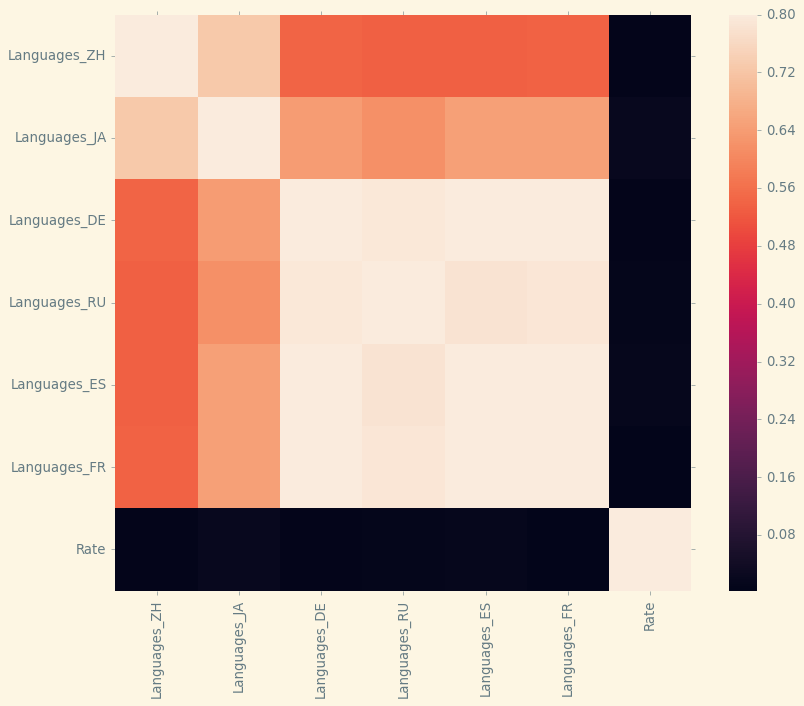

In [50]:

columns_to_keep = [c for c in x_train_top_features.columns if c.startswith('Languages')]
df3 = pd.concat([x_train[columns_to_keep], y_train], axis=1)

corrmat = df3.corr()

# plot the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:>

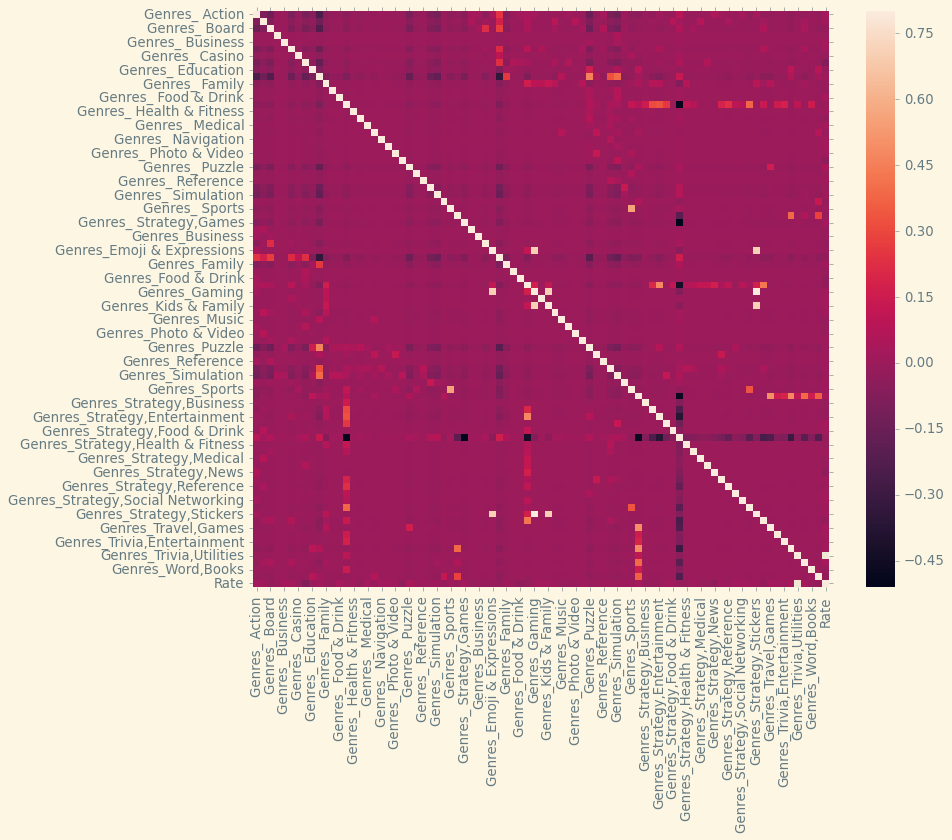

In [51]:
# get the correlation matrix for columns that start with "Genres"
columns_to_keep = [c for c in x_train.columns if c.startswith('Genres')]
df2 = pd.concat([x_train[columns_to_keep], y_train], axis=1)

corrmat = df2.corr()

# plot the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

<AxesSubplot:>

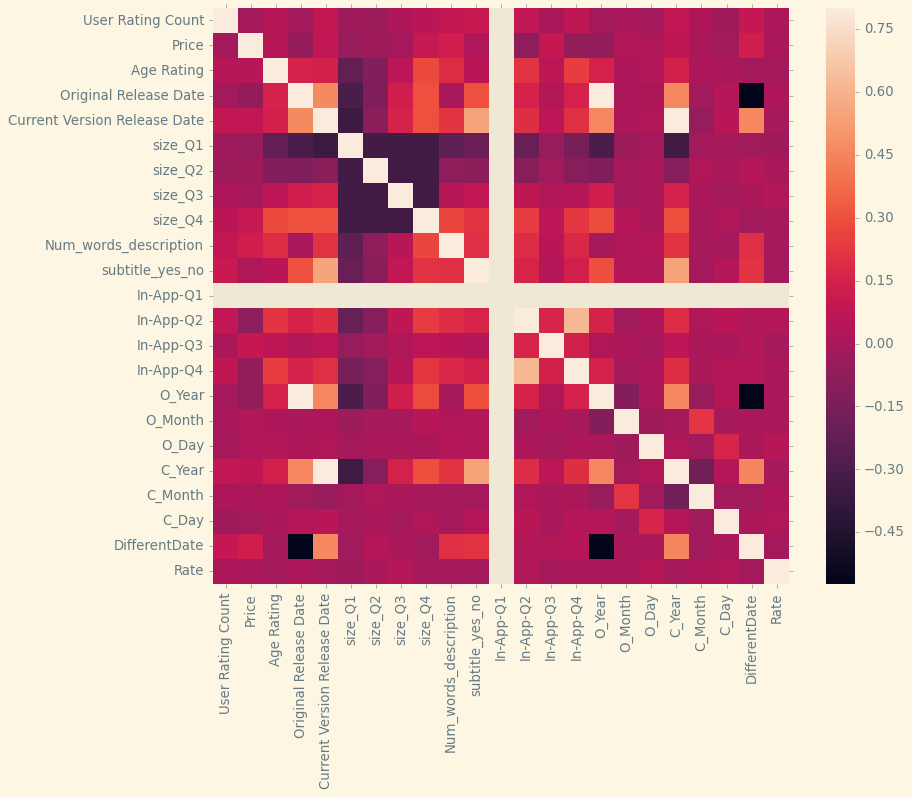

In [52]:

# combine x_train and y_train into a single DataFrame
data = pd.concat([x_train, y_train], axis=1)

# get the correlation matrix for the combined data
corrmat = data.corr()

# drop columns that start with "Languages"
columns_to_drop1 = [c for c in corrmat.columns if c.startswith('Languages')]
corrmat = corrmat.drop(columns_to_drop1, axis=1).drop(columns_to_drop1, axis=0)

# drop columns that start with "Genres"
columns_to_drop3 = [c for c in corrmat.columns if c.startswith('Genres')]
corrmat = corrmat.drop(columns_to_drop3, axis=1).drop(columns_to_drop3, axis=0)

# plot the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [53]:
'''
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the TfidfVectorizer class with desired parameters
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the "Description" feature in x_train
x_train_description_encoded = tfidf.fit_transform(x_train['Description'])

# Transform the "Description" feature in x_test
x_test_description_encoded = tfidf.transform(x_test['Description'])

# Combine the encoded "Description" feature with other features in both x_train and x_test
x_train = pd.concat([x_train.drop('Description', axis=1), pd.DataFrame(x_train_description_encoded.toarray())], axis=1)
x_test = pd.concat([x_test.drop('Description', axis=1), pd.DataFrame(x_test_description_encoded.toarray())], axis=1)

# Get the feature names from the TfidfVectorizer object
tfidf_feature_names = tfidf.get_feature_names()

# Define the list of features to use
features = ["User Rating Count", "Age Rating", "Price", "Size", "Primary Genre", "Languages_EN", "Genres_Games", "Genres_Strategy", "In-app Purchases"]
features += tfidf_feature_names  # add the encoded "Description" features

# Create a machine learning model and fit it on the training data
model = RandomForestClassifier(random_state=42)
model.fit(x_train[features], y_train)

# Make predictions on the testing data and evaluate the model performance
predictions = model.predict(x_test[features])
score = model.score(x_test[features], y_test)
print(f"Model score: {score}")
'''

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.ensemble import RandomForestClassifier\n\n# Create an instance of the TfidfVectorizer class with desired parameters\ntfidf = TfidfVectorizer(max_features=1000, stop_words=\'english\')\n\n# Fit and transform the "Description" feature in x_train\nx_train_description_encoded = tfidf.fit_transform(x_train[\'Description\'])\n\n# Transform the "Description" feature in x_test\nx_test_description_encoded = tfidf.transform(x_test[\'Description\'])\n\n# Combine the encoded "Description" feature with other features in both x_train and x_test\nx_train = pd.concat([x_train.drop(\'Description\', axis=1), pd.DataFrame(x_train_description_encoded.toarray())], axis=1)\nx_test = pd.concat([x_test.drop(\'Description\', axis=1), pd.DataFrame(x_test_description_encoded.toarray())], axis=1)\n\n# Get the feature names from the TfidfVectorizer object\ntfidf_feature_names = tfidf.get_feature_names()\n\n# Define the list of features to

In [54]:
import torch
from transformers import BertTokenizer, BertModel
def encode_text(text):
    # Load pre-trained BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Tokenize text and convert to tensors
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    input_ids = tokens['input_ids']
    attention_mask = tokens['attention_mask']

    # Pass tokens through BERT model to obtain embeddings
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        embeddings = outputs.last_hidden_state[:, 0, :].squeeze()

    # Convert embeddings to numpy array
    embeddings = embeddings.numpy()

    return embeddings

In [55]:
#x_train["Description"] = np.array([encode_text(text) for text in x_train["Description"]])
#x_test["Description"] = np.array([encode_text(text) for text in x_test["Description"]])

In [56]:
# Normalize the training and test features
c_scaler = StandardScaler()
x_train_top_features_norm = c_scaler.fit_transform(x_train_top_features)
x_test_top_features_norm = c_scaler.transform(x_test_top_features)

# Define classification models
svm = SVC()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

# Define parameter grids for hyperparameter tuning
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
logreg_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
dt_params = {'max_depth': [3, 5, 7]}
rfc_params = {'n_estimators': [100, 500, 1000], 'max_depth': [3, 5, 7]}
gbc_params = {'n_estimators': [500, 1000], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 1]}

# Perform hyperparameter tuning using grid search
svm_grid = GridSearchCV(svm, svm_params, cv=5, n_jobs=-1)
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, n_jobs=-1)
knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1)
dt_grid = GridSearchCV(dt, dt_params, cv=5, n_jobs=-1)
rfc_grid = GridSearchCV(rfc, rfc_params, cv=5, n_jobs=-1)
gbc_grid = GridSearchCV(gbc, gbc_params, cv=5, n_jobs=-1)

# Train and evaluate the models
models = [svm_grid, logreg_grid, knn_grid, dt_grid, rfc_grid, gbc_grid]
model_names = ['SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for i, model in enumerate(models):
    model.fit(x_train_top_features_norm, y_train)
    y_pred = model.predict(x_test_top_features_norm)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    print(model_names[i], ':')
    print('Accuracy: ', accuracy)
    print('F1 Score: ', f1)
    print('MSE: ', mse)
    print('Best Parameters: ', model.best_params_)
    print()

SVM :
Accuracy:  0.6059443911792906
F1 Score:  0.41554933366965147
Best Parameters:  {'C': 1, 'kernel': 'rbf'}



c:\Users\martina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\martina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\martina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\martina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\martina\anaconda3\lib\site-packages\sklearn\model_se

Logistic Regression :
Accuracy:  0.5877277085330777
F1 Score:  0.4047869720631963
Best Parameters:  {'C': 10, 'penalty': 'l2'}

KNN :
Accuracy:  0.5551294343240653
F1 Score:  0.4160140919897935
Best Parameters:  {'n_neighbors': 7, 'weights': 'distance'}

Decision Tree :
Accuracy:  0.5867689357622243
F1 Score:  0.4229173525661592
Best Parameters:  {'max_depth': 3}

Random Forest :
Accuracy:  0.6203259827420902
F1 Score:  0.4248055195750721
Best Parameters:  {'max_depth': 7, 'n_estimators': 500}

Gradient Boosting :
Accuracy:  0.6011505273250239
F1 Score:  0.4445176089958837
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}



In [57]:
x_test_top_features_norm.shape

(1043, 40)

In [89]:
import pickle

models = [c_encoder, c_MLB, c_multiLB, c_scaler, svm_grid, logreg_grid, knn_grid, dt_grid, rfc_grid]
model_names = ['c_encoder', 'c_MLB', 'c_multiLB', 'c_scaler', 'SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']

for i, model in enumerate(models):
    pickle_file = f"{model_names[i]}.pkl"
    pickle.dump(model, open(pickle_file, 'wb'))

In [90]:
pickle_out = open("gbc_grid.sav","wb")
pickle.dump(gbc_grid, pickle_out)
pickle_out.close()

In [65]:
def preprocess_input(data, encoder, MLB, multiLB, top_features, scaler):
    
    if(data['Languages'].isnull().sum()):
        data['Languages'] = data['Languages'].fillna('EN')

    data['size_Q1'] = data['Size'].apply(lambda x: 1 if x < 2.751732e+07 else 0)
    data['size_Q2'] = data['Size'].apply(lambda x: 1 if 2.751732e+07 <= x < 6.740582e+07 else 0)
    data['size_Q3'] = data['Size'].apply(lambda x: 1 if 6.740582e+07 <= x < 1.592689e+08 else 0)
    data['size_Q4'] = data['Size'].apply(lambda x: 1 if x >= 1.592689e+08 else 0)

    data['Num_words_description'] = data['Description'].apply(lambda x: len(re.findall('(\w+)',str(x))))

    if(data['Subtitle'].isnull().iloc[0]):
        data['Subtitle'] = data['Subtitle'].fillna('')
    data['subtitle_yes_no'] = data['Subtitle'].apply(lambda x: 0 if x == '' else 1)

    if(data['In-app Purchases'].isnull().sum()):
        data['In-app Purchases'] = data['In-app Purchases'].fillna('0.0') #No data will be taken as $0
    data['In-app Purchases'] = data['In-app Purchases'].apply(lambda x: '0.0' if x == '0' else x) #for consistency
    data['In-app Purchases'] = data['In-app Purchases'].apply(lambda x: x.split(', ')) #turn string into list

    # Prices range from 0 to 99.99. Split into 4 quadrants
    data['In-App-Q1'] = data['In-app Purchases'].apply(lambda x: 1 if any(float(i) < 25 for i in x) else 0) #prices from 0 to 24.99
    data['In-App-Q2'] = data['In-app Purchases'].apply(lambda x: 1 if any(25 <= float(i) < 50 for i in x) else 0) #prices from 25 to 49.99
    data['In-App-Q3'] = data['In-app Purchases'].apply(lambda x: 1 if any(50 <= float(i) < 75 for i in x) else 0) #prices from 50 to 74.99
    data['In-App-Q4'] = data['In-app Purchases'].apply(lambda x: 1 if any(75 <= float(i) < 100 for i in x) else 0) #prices from 75 to 99.99
    
    data['Primary Genre'] = encoder.transform(data['Primary Genre'])

    scale_mapper = {"4+":4, "9+":9, "12+":12, "17+":17}
    data["Age Rating"] = data["Age Rating"].replace(scale_mapper)
    
    date(data,'Original Release Date')
    date(data,'Current Version Release Date')
    data['DifferentDate'] = data['Current Version Release Date'] - data['Original Release Date']
    
    print(data.shape)

    data['Languages'] = data["Languages"].str.split(", ")
    for i in data["Languages"]:
        if(type(i)== float):
            print(i)
    x_Languages_encoded = MLB.transform(data["Languages"])
    new_feature_names = ['Languages_' + name for name in MLB.classes_]
    data = pd.concat([data.reset_index(drop=True), pd.DataFrame(x_Languages_encoded, columns=new_feature_names)], axis=1)    

    data['Genres'] = data["Genres"].str.split(", ")
    x_test_developer_encoded = multiLB.transform(data["Genres"])
    new_feature_names = ['Genres_' + name for name in multiLB.classes_]
    data = pd.concat([data.reset_index(drop=True), pd.DataFrame(x_test_developer_encoded, columns=new_feature_names)], axis=1)    

    data = data.drop(columns=['URL','ID','Name','Subtitle','Icon URL','In-app Purchases','Description','Developer','Languages', 'Primary Genre','Genres'],axis=1)
    
    data= data[top_features]
    #print(data)
    data_norm = scaler.transform(data)
    return data_norm

In [66]:
array = ['https://apps.apple.com/us/app/heir-of-light/id1264483706', 1264483706, 'HEIR OF LIGHT', 'Dark Fantasy RPG',	'https://is3-ssl.mzstatic.com/image/thumb/Purple123/v4/1b/0a/0f/1b0a0fd3-18f7-1889-8ddb-dce2c71784c9/source/512x512bb.jpg',	982, 0,	'29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, 29.99, 29.99, 8.99, 9.99, 29.99, 29.99, 9.99, 9.99, 14.99',	'A Dark Fantasy, Collectible RPG\n\nDarkness has overtaken the realm, and the world is in chaos. The only hope to restore light and order lies with you, an Heir of Light. Embark on a crusade to renew a hope that has been lost for generations. Ready your weapon and journey to restore the light of the world!\n\nFeatures\n\n\u25a0 Be A Light in the Darkness\n- Shine light upon a world shrouded in darkness. The war will only end when light shines upon every inch of the land.\n- Expand the territory in any direction you desire!\n- Mobs are no longer in your way, Exclusive Boss Battles Only!\n\n\u25a0 Collect Powerful Servants\n- Summon powerful Servants to fight at your side.\n- Form your Crusade from among over 350 Servants.\n- Enhance, Evolve, and Awaken to unlock their true potential.\n- Diverse Roles for each Servant: Attack, Defense, Support, Healer.\n\n\u25a0 Devise and Strategize\n- Your Servants are the key of your Crusade, customize their Skills for every battle.\n- Customize your Gear Combination to gain unique Set Effects.\n- Couple the various different Skills and Elements to assemble the most strategic Crusade. \n\n\u25a0 Heed the Savage Battlefield\n- Pulverize your opponents in PvP mode to prove your power.\n- Preserve your Towers! Defense is the first step in strategic combat.\n- Challenge yourself to various dungeons and earn rare rewards. Godspeed!\n\n\u25a0 An Eerie and Mysterious World\n- Not just another RPG! Immerse yourself in a magical and mysterious fantasy world.\n- Cute yet bizarre, uncanny yet charming! Servants are ready to accompany you on your journey.\n\nSubscription - Repeat Battle I\n- Repeat Battle 150 times / 10% Bonus Gold\n- Karats & Valor sent daily!\n- $8.99 monthly (Price may vary by location)\n\n- Payment will be charged to your iTunes account at confirmation of purchase.\n- Your subscription automatically renews unless auto-renewal is turned off at least 24-hours before the end of the current period.\n- Your account will be charged for renewal within 24-hours prior to the end of the current period.\n- Subscriptions may be managed by the user, and auto-renewal may be turned off by going to the user\u2019s Account Settings after purchase.\n- Any unused portion of a free trial period, if offered, will be forfeited when the user purchases a subscription.\n- Terms of Use: http://terms.withhive.com/terms/policy/view/M5\n- Privacy Policy: http://terms.withhive.com/terms/policy/view/M5/T3\n\n* Moot community : https://moot.us/lounges/178/\n\n** This game is available in \ud55c\uad6d\uc5b4, English, \u65e5\u672c\u8a9e, \u4e2d\u6587\u7b80\u4f53, \u4e2d\u6587\u7e41\u9ad4, Deutsch, Fran\xe7ais, Espa\xf1ol, Vietnam, \u0e44\u0e17\u0e22.\n** There may be additional costs when trying to obtain certain items.\n\n* Access authorization notice for gameplay\nCAMERA: HIVE requires access to your camera to take profile images.\nCONTACTS: HIVE requires access to your contacts to find friends.\nPHOTOS: HIVE requires access to your photos to change profile images or save/load the game screen.\n\n* GAMEVIL Official Website : https://www.withhive.com\n* GAMEVIL Customer Support : https://m.withhive.com/customer/inquire',	'GAMEVIL Inc.',	'12+',	'EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI',	894489600,	'Games',	'Games, Role Playing, Strategy',	'6/3/2018',	'31/07/2019',	4]

In [67]:
df = pd.DataFrame([array])

df.columns = ['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'User Rating Count', 'Price', 'In-app Purchases', 
                       'Description', 'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre', 'Genres', 
                       'Original Release Date', 'Current Version Release Date', 'Rate']

df.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'User Rating Count',
       'Price', 'In-app Purchases', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date', 'Rate'],
      dtype='object')

In [68]:
import pickle

# Assuming that `top_feature_indices` is already defined
pickle_file = "top_feature_indices.pkl"
pickle.dump(top_feature_indices, open(pickle_file, 'wb'))

pickle_file = "top_feature_indices.pkl"
top = pickle.load(open(pickle_file,'rb'))

print(top)

Index(['User Rating Count', 'Original Release Date',
       'Current Version Release Date', 'Num_words_description',
       'DifferentDate', 'O_Day', 'C_Day', 'C_Month', 'O_Month', 'O_Year',
       'C_Year', 'Age Rating', 'Price', 'subtitle_yes_no',
       'Genres_Entertainment', 'size_Q1', 'size_Q2', 'size_Q3',
       'Genres_ Entertainment', 'size_Q4', 'Genres_ Action', 'In-App-Q2',
       'Genres_ Board', 'Genres_Puzzle', 'Languages_ZH', 'Genres_Simulation',
       'Genres_ Simulation', 'Genres_ Puzzle', 'Genres_ Casual',
       'Genres_Strategy,Games', 'Languages_JA', 'Genres_ Adventure',
       'Languages_DE', 'Languages_RU', 'In-App-Q4', 'Languages_ES',
       'Languages_FR', 'Genres_ Card', 'Genres_ Role Playing',
       'Genres_Role Playing'],
      dtype='object')


In [69]:
sample= preprocess_input(df,c_encoder, c_MLB, c_multiLB, top, c_scaler)
print(sample)
print(col)

(1, 35)
[[-0.07914068  1.46359552  1.24348022  1.52252598 -0.31680952 -1.08998733
   1.69853635  0.13820161 -1.06250772  1.59870218  1.1899673   1.37141884
  -0.22660985  1.62664656 -0.54160256 -0.57301304 -0.57596607 -0.57670431
  -0.62328326  1.71315664 -0.39866407  2.28794201 -0.36527238 -0.37780911
   1.98395934 -0.30921407 -0.27838706 -0.26412398 -0.26308368 -3.31966458
   2.10667283 -0.217257    1.91320025 -0.46593938 -0.32433536  1.9973068
   1.9578407  -0.22909712 -0.22559794  4.18781301]]
Rate


In [70]:
import os
# Define the list of models and their names
model_names =  ['encoder', 'le', 'c_MLB', 'multiLB', 'scaler', 'SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
models = []

def load_models():
    # Load the models from their respective joblib files
    for name in model_names:
        pickle_file = f"{name}.pkl"
        pickle_file = os.path.join('D:/FCIS/Pattern/project/', pickle_file)
        model = pickle.load(open(pickle_file,'rb'))
        models.append(model)
    
    pickle_in = open("D:/FCIS/Pattern/project/mr.pickle","rb")
    mr = pickle.load(pickle_in)
    pickle_in = open("D:/FCIS/Pattern/project/pr.pickle","rb")
    pr = pickle.load(pickle_in)
    models.append(mr)
    models.append(pr)
    model_names.append('mr')
    model_names.append('pr')

In [71]:
load_models()

In [72]:
print(len(model_names))

13


In [73]:
def make_prediction(data, Y):
    #data = data.reshape((len(data), 1))

    # Apply the trained regression models to the input data
    predictions = []
    mse_scores = []
    r2_scores = []
    prediction = models[5].predict(data[:,0].reshape(-1,1))
    print(y_pred.shape)
    print(Y.shape)
    mse = mean_squared_error(Y, prediction)
    r2 = r2_score(Y, prediction)
    predictions.append((model_names[5], prediction))
    mse_scores.append(mse)
    r2_scores.append(r2)
    for i in range(6, len(models)):
        print(i)
        model_name = model_names[i]
        model = models[i]
        prediction = model.predict(data)
        mse = mean_squared_error(Y, prediction)
        r2 = r2_score(Y, prediction)
        predictions.append((model_name, prediction))
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    return predictions, mse_scores, r2_scores

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,Normalizer,OneHotEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime
import time
import re
from requests.exceptions import RequestException
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import streamlit as st
import joblib,pickle
import os

# Load the dataset and split it into training and test sets
data = pd.read_csv('D:/FCIS/Pattern/project/games-classification-dataset.csv')
x_train, x_test, y_train, y_test = train_test_split(data.drop('Rate', axis=1), data['Rate'], test_size=0.20, random_state=42)

def date(data,x):
    data[x] = pd.to_datetime(data[x], dayfirst=True,infer_datetime_format=True)
    data[x[0]+'_Year'] = pd.DatetimeIndex(data[x]).year
    data[x[0]+'_Month'] = pd.DatetimeIndex(data[x]).month
    data[x[0]+'_Day'] = pd.DatetimeIndex(data[x]).day
    data[x]=data[x].map(datetime.toordinal)


# Define the list of models and their names
model_names = ['c_encoder', 'c_MLB', 'c_multiLB', 'c_scaler', 'SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
models = []

def load_models():
    # Load the models from their respective joblib files
    for name in model_names:
        pickle_file = f"{name}.pkl"
        pickle_file = os.path.join('D:/FCIS/Pattern/project/', pickle_file)
        model = pickle.load(open(pickle_file,'rb'))
        models.append(model)

# Define a function to preprocess the input data


def preprocess_input(data, encoder, MLB, multiLB, top_features, scaler):
    
    if(data['Languages'].isnull().sum()):
        data['Languages'] = data['Languages'].fillna('EN')

    data['size_Q1'] = data['Size'].apply(lambda x: 1 if x < 2.751732e+07 else 0)
    data['size_Q2'] = data['Size'].apply(lambda x: 1 if 2.751732e+07 <= x < 6.740582e+07 else 0)
    data['size_Q3'] = data['Size'].apply(lambda x: 1 if 6.740582e+07 <= x < 1.592689e+08 else 0)
    data['size_Q4'] = data['Size'].apply(lambda x: 1 if x >= 1.592689e+08 else 0)

    data['Num_words_description'] = data['Description'].apply(lambda x: len(re.findall('(\w+)',str(x))))

    if(data['Subtitle'].isnull().iloc[0]):
        data['Subtitle'] = data['Subtitle'].fillna('')
    data['subtitle_yes_no'] = data['Subtitle'].apply(lambda x: 0 if x == '' else 1)

    if(data['In-app Purchases'].isnull().sum()):
        data['In-app Purchases'] = data['In-app Purchases'].fillna('0.0') #No data will be taken as $0
    data['In-app Purchases'] = data['In-app Purchases'].apply(lambda x: '0.0' if x == '0' else x) #for consistency
    data['In-app Purchases'] = data['In-app Purchases'].apply(lambda x: x.split(', ')) #turn string into list

    # Prices range from 0 to 99.99. Split into 4 quadrants
    data['In-App-Q1'] = data['In-app Purchases'].apply(lambda x: 1 if any(float(i) < 25 for i in x) else 0) #prices from 0 to 24.99
    data['In-App-Q2'] = data['In-app Purchases'].apply(lambda x: 1 if any(25 <= float(i) < 50 for i in x) else 0) #prices from 25 to 49.99
    data['In-App-Q3'] = data['In-app Purchases'].apply(lambda x: 1 if any(50 <= float(i) < 75 for i in x) else 0) #prices from 50 to 74.99
    data['In-App-Q4'] = data['In-app Purchases'].apply(lambda x: 1 if any(75 <= float(i) < 100 for i in x) else 0) #prices from 75 to 99.99
    
    data['Primary Genre'] = encoder.transform(data['Primary Genre'])

    scale_mapper = {"4+":4, "9+":9, "12+":12, "17+":17}
    data["Age Rating"] = data["Age Rating"].replace(scale_mapper)
    
    date(data,'Original Release Date')
    date(data,'Current Version Release Date')
    data['DifferentDate'] = data['Current Version Release Date'] - data['Original Release Date']

    print(data.shape)

    data['Languages'] = data["Languages"].str.split(", ")
    for i in data["Languages"]:
        if(type(i)== float):
            print(i)
    x_Languages_encoded = MLB.transform(data["Languages"])
    new_feature_names = ['Languages_' + name for name in MLB.classes_]
    data = pd.concat([data.reset_index(drop=True), pd.DataFrame(x_Languages_encoded, columns=new_feature_names)], axis=1)    

    data['Genres'] = data["Genres"].str.split(", ")
    x_test_developer_encoded = multiLB.transform(data["Genres"])
    new_feature_names = ['Genres_' + name for name in multiLB.classes_]
    data = pd.concat([data.reset_index(drop=True), pd.DataFrame(x_test_developer_encoded, columns=new_feature_names)], axis=1)    

    data = data.drop(columns=['URL','ID','Name','Subtitle','Icon URL','In-app Purchases','Description','Developer','Languages', 'Primary Genre','Genres'],axis=1)
    
    data= data[top_features]
    #print(data)
    data_norm = scaler.transform(data)
    return data_norm


# Define a function to make predictions on the input data
def make_prediction(data, Y):
    #data = data.reshape((len(data), 1))
    
    # Apply the trained regression models to the input data
    predictions = []
    mse_scores = []
    r2_scores = []
    
    for i in range(4, len(models)):
        print(i)
        model_name = model_names[i]
        model = models[i]
        prediction = model.predict(data)
        mse = mean_squared_error(Y, prediction)
        r2 = r2_score(Y, prediction)
        predictions.append((model_name, prediction))
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    return predictions, mse_scores, r2_scores


# Define the app layout
def app2():
    # Set the app title
    st.title('Game Application Success Prediction')

    #Load Models
    load_models()
    pickle_file = "top_feature_indices.pkl"
    top = pickle.load(open(pickle_file,'rb'))
    # Define the input options
    input_option = st.selectbox('Select input option', ('Manual input', 'CSV file'))

    # Define the input text boxes for manual input
    if input_option == 'Manual input':
        url = st.text_input('URL')
        id = st.text_input('ID')
        name = st.text_input('Name')
        subtitle = st.text_input('Subtitle')
        icon_url = st.text_input('Icon URL')
        user_rating_count = st.text_input('User Rating Count')
        price = st.text_input('Price')
        in_app_purchases = st.text_input('In-app Purchases')
        description = st.text_input('Description')
        developer = st.text_input('Developer')
        age_rating = st.text_input('Age Rating')
        languages = st.text_input('Languages')
        size = st.text_input('Size')
        primary_genre = st.text_input('Primary Genre')
        genres = st.text_input('Genres')
        original_release_date = st.text_input('Original Release Date')
        current_version_release_date = st.text_input('Current Version Release Date')

        # Define the submit button for manual input
        if st.button('Submit'):
            # Combine the input data into a DataFrame
            input_data = pd.DataFrame({
                'URL': [url],
                'ID': [id],
                'Name': [name],
                'Subtitle': [subtitle],
                'Icon URL': [icon_url],
                'User Rating Count': [user_rating_count],
                'Price': [price],
                'In-app Purchases': [in_app_purchases],
                'Description': [description],
                'Developer': [developer],
                'Age Rating': [age_rating],
                'Languages': [languages],
                'Size': [size],
                'Primary Genre': [primary_genre],
                'Genres': [genres],
                'Original Release Date': [original_release_date],
                'Current Version Release Date': [current_version_release_date]
            })

            # Preprocess the input data
            processed_data = preprocess_input(input_data)

            # Make a prediction on the input data
            predictions = make_prediction(processed_data)

            # Display the predictions
            st.write('Rate:')
            st.write(prediction[0])

    # Define the file uploader for CSV input
    elif input_option == 'CSV file':
        uploaded_file = st.file_uploader('Upload CSV file', type='csv')

        # Define the submit button for CSV input
        if uploaded_file is not None and st.button('Submit'):
            # Load the data from the uploaded CSV file
            data = pd.read_csv(uploaded_file)
            X = data.drop('Rate', axis=1)
            Y = data['Rate'].values
            scale_mapper = {"Low":1, "Intermediate":2, "High":3}
            Y = data.replace(scale_mapper)
            # Preprocess the input data
            processed_data = preprocess_input(X, models[0], models[1], models[2], top, models[3])
            processed_data = np.array(processed_data)

            # Make a prediction on the input data
            predictions, mse_scores, r2_scores = make_prediction(processed_data, Y)

            # Display the prediction
            for i, (name, prediction) in enumerate(predictions):
                st.write(f"Model {i+1}: {name}")
                st.write(f"Prediction: {prediction}")
                st.write(f"Mean Squared Error: {mse_scores[i]}")
                st.write(f"R2 score: {r2_scores[i]}")

if __name__ == '__main__':
    app2()

2023-05-23 06:01:10.164 
  command:

    streamlit run c:\Users\martina\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [75]:
app2()

In [78]:
load_models()
pickle_file = "top_feature_indices.pkl"
top = pickle.load(open(pickle_file,'rb'))

In [85]:
df = pd.read_csv('D:/FCIS/Pattern/project/games-classification-dataset.csv')
X = df.drop('Rate', axis=1)
Y = df['Rate'].values
Y = pd.Series(Y)
print(Y)
scale_mapper = {"Low":1, "Intermediate":2, "High":3}

Y = Y.replace(scale_mapper)

# Preprocess the input data
processed_data = preprocess_input(X, models[0], models[1], models[2], top, models[3])
processed_data

0       Intermediate
1       Intermediate
2               High
3       Intermediate
4               High
            ...     
5209            High
5210            High
5211            High
5212    Intermediate
5213    Intermediate
Length: 5214, dtype: object
(5214, 34)


c:\Users\martina\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:860: UserWarning: unknown class(es) ['Action', 'Adventure', 'Board', 'Card', 'Casino', 'Casual', 'Medical', 'Navigation', 'Shopping', 'Stickers', 'Travel', 'Trivia', 'Utilities', 'Word'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'


array([[-0.07914068,  1.46359552,  1.24348022, ..., -0.22909712,
        -0.22559794,  4.18781301],
       [-0.11199852, -0.68381765,  0.26322963, ..., -0.22909712,
        -0.22559794, -0.23878812],
       [-0.11216912, -0.667217  , -0.76327133, ..., -0.22909712,
        -0.22559794, -0.23878812],
       ...,
       [-0.11223736, -0.94112779,  0.10006865, ..., -0.22909712,
        -0.22559794, -0.23878812],
       [-0.09292528,  0.70945152,  0.07180454, ..., -0.22909712,
        -0.22559794,  4.18781301],
       [-0.08596474, -0.91148376, -0.81209115, ..., -0.22909712,
        -0.22559794, -0.23878812]])

In [86]:

#processed_data = np.array(processed_data)

# Make a prediction on the input data
predictions, mse_scores, r2_scores = make_prediction(processed_data, Y)


4
5
6
7
8
9
10


IndexError: list index out of range